In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import torch

In [15]:
def create_input(n,p):
    
    return np.random.choice([0,1],size=n,p=[p,1-p])

In [53]:
xtest = create_input(100,0.7)
xtest.nonzero()

(array([ 0,  7, 10, 12, 16, 19, 25, 29, 32, 33, 34, 35, 38, 43, 50, 54, 59,
        60, 62, 64, 67, 69, 70, 74, 76, 83, 85, 88, 91, 92, 93, 95]),)

In [17]:
def create_tests(T,n,alpha):
    
    return np.random.choice([0,1],size=(T,n),p=[alpha,1-alpha])

In [50]:
create_tests(60,100,0.9)@create_input(100,0.9)

array([0, 1, 3, 2, 0, 1, 2, 2, 0, 1, 1, 0, 4, 1, 1, 1, 2, 1, 0, 2, 2, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 0, 2, 1, 1,
       1, 1, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 0])

In [51]:
def evaluate(x_estimate,x):
    
    diff = x_estimate-x
    diff[diff != 0] = 1
    
    return np.mean(diff)

# COMP algorithm

In [282]:
class COMP:
    
    """ 
    
    The COMP algorithm conservatively reconstructs the true vector x given a test matrix and a test result.
    It works by declaring healthy only the individuals that are in a group with negative test result.
    Initialize COMP with the true (unknown) vector x and the test matrix. 
    
    * reconstruct() outputs the vector reconstructed by the COMP algorithm.
    
    * score() computes the 0-1 accuracy of the algorithm.
    
    * average_score(mat_size,number,alpha) is a function meant for evaluating the performance of the COMP algorithm 
    with random tests. It computes the 0-1 accuracy for number test designs with mat_size random tests 
    (parametrized by alpha), and outputes the average performance of the COMP algorithm. 
    
    """
    
    def __init__(self,true_x,test_matrix):
        
        self.true_x = true_x
        self.popsize = true_x.shape[0]
        self.test_matrix = test_matrix
        print(self.test_matrix.shape[1])
        print(self.true_x.shape)
        
        if self.true_x.shape[0] != (self.test_matrix.shape)[1]:
            
            raise Exception("Number of columns in the test matrix and true vector size should be equal.")
            
        self.test_result = test_matrix@true_x
        
        
    def reconstruct(self,test_mat=None):
        
        
        if type(test_mat) != type(None):
                        
            #Allows for reconstruction with different test matrix, used in average_score()
            
            test_matrix = test_mat
            test_result = test_mat@(self.true_x)
            
        else:
            
            test_matrix = self.test_matrix
            test_result = self.test_result
        
        reconstructed_x = np.ones(test_matrix.shape[1])
        
        for line in np.arange(test_matrix.shape[0]):
            
            if test_result[line] == 0:
                
                def_negatives = test_matrix[line].nonzero()
                
                reconstructed_x[def_negatives] = 0
                
        return reconstructed_x
    
    
    def score(self,test_mat=None):
                
        if type(test_mat) != type(None):
            
            #Allows for reconstruction with different test matrix, used in average_score()
            
            reconstructed_x = self.reconstruct(test_mat=test_mat)
        
        else:
            
            reconstructed_x = self.reconstruct()
            
            
        diff = reconstructed_x - self.true_x
        diff[diff != 0] = 1
        
        return np.mean(1-diff)
    
    
    def average_score(self,mat_size,number,alpha):
        
        output = 0
        
        for i in np.arange(number):
            
            random_matrix = np.random.choice([0,1],size=(mat_size,self.popsize),p=[alpha,1-alpha])
            
            output += self.score(test_mat=random_matrix)
            
        return output/number

In [290]:
x_test = create_input(150,0.9)
mat_test = create_tests(100,150,0.9) 
COMP_alg = COMP(x_test,mat_test) 
rec_x = COMP_alg.reconstruct()
print(COMP_alg.score())
print(COMP_alg.average_score(80,10000,0.9))

150
(150,)
0.96
0.9071393333332773


150
(150,)


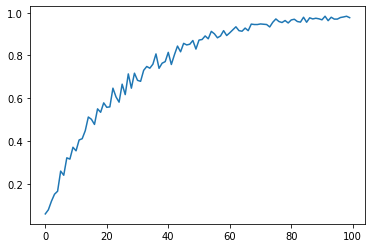

In [299]:
x_test = create_input(150,0.9)

results = []

comp = COMP(x_test,mat_test)

for test_number in np.arange(100):
    
    output = comp.average_score(test_number,10,0.9)
    results.append(output)
    
plt.plot(results)
plt.show()

    
    

200
(200,)
0.84


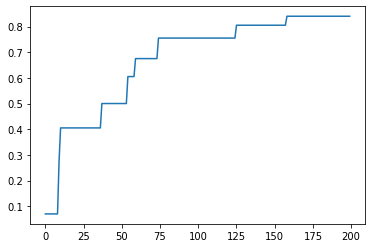

In [318]:
x_test = create_input(200,0.9)
mat_test = create_tests(200,200,0.8) 
COMP_alg = COMP(x_test,mat_test) 
rec_x = COMP_alg.reconstruct()
print(COMP_alg.score())

results = []

for i in np.arange(0,200):
    
    output = COMP_alg.score(mat_test[0:i,:])
    results.append(output)
    
plt.plot(results)
plt.show()